In [4]:
import mne 
import matplotlib.pyplot as plt
import numpy as np 
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs #funkcje ica

In [ ]:
"""WSTĘPNE USTAWIENIA PRZED WCZYTANIEM SYGNAŁU"""
d_path = "eeg_files/20241017_kp.bdf" #ścieżka do pliku
ch_eog = ["EXG1","EXG2"] #zdefiniowanie dedykowanych kanałów EOG
ch_ecg = ["EXG3","EXG4"] #zdefiniowanie dedykowanych kanałów ECG
ch_exclude = [f"EXG{i}" for i in range(5,9)] #wykluczenie kanałów niewykorzystanych w badaniu
"""ZAŁADOWANIE SYGNAŁU I USTAWIENIE UKŁADU ELEKTROD"""
raw = mne.io.read_raw_bdf(
    d_path, preload = True, eog = ch_eog, misc = ch_ecg, exclude = ch_exclude 
)
raw.set_montage("biosemi64")
notch = 50 
bandpass_low = 0.1 
bandpass_high = 40
raw.filter(bandpass_low, bandpass_high) 
raw.notch_filter(notch)


In [ ]:
from pyprep.prep_pipeline import PrepPipeline
montage = raw.get_montage()
raw_for_pyprep=raw.copy() #utworzenie kopi do pyprep
sample_rate = raw_for_pyprep.info["sfreq"] #pobranie informacji o częstotliwości próbkowania
montage = mne.channels.make_standard_montage("biosemi64") #ustawienie montażu
prep_params = {
    "ref_chs": "eeg", 
    "reref_chs": "eeg",
    "line_freqs": [],
}
prep = PrepPipeline(raw_for_pyprep, prep_params, montage)
prep.fit()

In [4]:
raw_full_processed_by_prep = prep.raw  

In [ ]:
raw_full_processed_by_prep.interpolate_bads()

In [ ]:
ica = mne.preprocessing.ICA(
    n_components=None, 
    max_iter='auto', 
    random_state=97
    )
ica.fit(raw_full_processed_by_prep)

In [ ]:
raw_full_processed_by_prep.save("eeg_files/raw_full_processed_by_prep.fif")

In [ ]:
plt.figure(figsize=(5, 4))
raw.plot()

In [ ]:
ica.plot_components(nrows = 8, ncols = 4)

In [ ]:
%matplotlib inline 
ica.plot_properties(raw_full_processed_by_prep, picks=[0,1,2,3,4,5,6,8])


In [ ]:
raw.plot() 

In [ ]:
fig = raw.plot(
    duration=raw.times[-1],
    n_channels=len(raw.ch_names[0:64]),
    scalings={'eeg': 2409e-6},
    show_scrollbars=False,
    show_scalebars=False,
)
fig(figsize=(10,4)).show()

In [ ]:

corr = np.corrcoef(data)
eeg_channels = raw.ch_names
channels_to_exclude = ['EXG1', 'EXG2', 'EXG3', 'EXG4']
for channel_to_remove in channels_to_exclude:
    if channel_to_remove in eeg_channels:
        eeg_channels.remove(channel_to_remove)

plt.figure(figsize=(10,10))
plt.imshow(corr, cmap='RdBu_r',interpolation="nearest")
plt.colorbar(label='Pearson r')
plt.xticks(range(len(eeg_channels)), eeg_channels, rotation=90)
plt.yticks(range(len(eeg_channels)), eeg_channels)
plt.show()

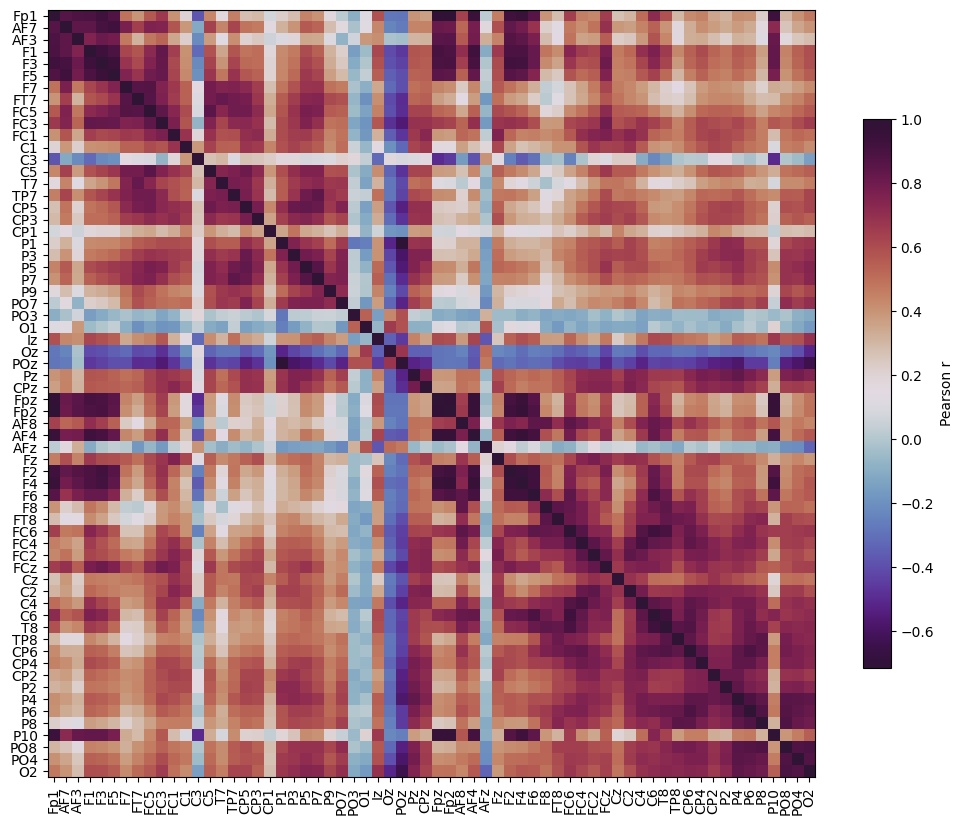

In [76]:

corr = np.corrcoef(data)
eeg_channels = raw.ch_names
channels_to_exclude = ['EXG1', 'EXG2', 'EXG3', 'EXG4',"Status"]
for channel_to_remove in channels_to_exclude:
    if channel_to_remove in eeg_channels:
        eeg_channels.remove(channel_to_remove)

plt.figure(figsize=(10, 11))
plt.imshow(corr, cmap="twilight_shifted", interpolation="nearest")
plt.colorbar(label='Pearson r',shrink=0.5)
plt.xticks(range(len(eeg_channels)), eeg_channels, rotation=90)
plt.yticks(range(len(eeg_channels)), eeg_channels)

# Zwiększ padding
plt.tight_layout(pad=0.1)
plt.show()

In [77]:
import pandas as pd
mean_corr = corr.mean(axis=1)
mean_corr_rounded = mean_corr.round(2)
mean_corr_df = pd.DataFrame(mean_corr_rounded,index=eeg_channels,columns = ["średnie r"])

In [78]:
mean_corr_df 

,średnie r
Fp1,0.45
AF7,0.47
AF3,0.39
F1,0.54
F3,0.54
...,...
P8,0.48
P10,0.42
PO8,0.50
PO4,0.52


In [79]:
latex_code_full = mean_corr_df.to_latex(
    caption="Średnia korelacja każdego kanału EEG ze wszystkimi pozostałymi.",
    label="tab:srednia_korelacja",
    position="H" # Wymaga pakietu 'float' w LaTeX
)
print(latex_code_full)

\begin{table}[H]
\caption{Średnia korelacja każdego kanału EEG ze wszystkimi pozostałymi.}
\label{tab:srednia_korelacja}
\begin{tabular}{lr}
\toprule
 & średnie r \\
\midrule
Fp1 & 0.450000 \\
AF7 & 0.470000 \\
AF3 & 0.390000 \\
F1 & 0.540000 \\
F3 & 0.540000 \\
F5 & 0.520000 \\
F7 & 0.430000 \\
FT7 & 0.420000 \\
FC5 & 0.510000 \\
FC3 & 0.550000 \\
FC1 & 0.510000 \\
C1 & 0.440000 \\
C3 & 0.010000 \\
C5 & 0.480000 \\
T7 & 0.360000 \\
TP7 & 0.480000 \\
CP5 & 0.480000 \\
CP3 & 0.470000 \\
CP1 & 0.250000 \\
P1 & 0.440000 \\
P3 & 0.500000 \\
P5 & 0.530000 \\
P7 & 0.500000 \\
P9 & 0.380000 \\
PO7 & 0.380000 \\
PO3 & -0.000000 \\
O1 & 0.010000 \\
Iz & 0.400000 \\
Oz & -0.230000 \\
POz & -0.340000 \\
Pz & 0.550000 \\
CPz & 0.530000 \\
Fpz & 0.440000 \\
Fp2 & 0.440000 \\
AF8 & 0.460000 \\
AF4 & 0.500000 \\
AFz & 0.020000 \\
Fz & 0.490000 \\
F2 & 0.530000 \\
F4 & 0.500000 \\
F6 & 0.510000 \\
F8 & 0.410000 \\
FT8 & 0.420000 \\
FC6 & 0.530000 \\
FC4 & 0.540000 \\
FC2 & 0.550000 \\
FCz & 0.580000 \

In [80]:
mean_corr = corr.mean(axis=1)
mean_corr_rounded = mean_corr.round(2)
mean_corr_df = pd.DataFrame(mean_corr_rounded, index=eeg_channels, columns=["Średnie r"])

# --- NOWA, LEPSZA LOGIKA ---

# 1. Przygotowanie danych
# Resetujemy indeks, aby nazwy kanałów stały się zwykłą kolumną
df_to_split = mean_corr_df.reset_index()
df_to_split.columns = ['Kanał', 'Średnie r']

# 2. Podział na dwie części
# Znajdujemy punkt środkowy do podziału (zaokrąglając w górę)
midpoint = int(np.ceil(len(df_to_split) / 2))

# Tworzymy dwa osobne DataFrame'y
df_part1 = df_to_split.iloc[:midpoint]
df_part2 = df_to_split.iloc[midpoint:].reset_index(drop=True) # reset_index jest ważny!

# 3. Połączenie w jedną, wielokolumnową tabelę
# Używamy pd.concat z axis=1, aby połączyć je obok siebie
final_df_for_latex = pd.concat([df_part1, df_part2], axis=1)

# 4. Wygenerowanie kodu LaTeX z nowej, ładniejszej tabeli
# Używamy opcji, które omawialiśmy wcześniej
latex_code = final_df_for_latex.to_latex(
    caption="Średnia korelacja każdego kanału EEG ze wszystkimi pozostałymi, przedstawiona w dwóch kolumnach.",
    label="tab:srednia_korelacja_multi",
    index=False, # Nie chcemy domyślnego indeksu 0,1,2...
    position="H"
)

print(latex_code)

\begin{table}[H]
\caption{Średnia korelacja każdego kanału EEG ze wszystkimi pozostałymi, przedstawiona w dwóch kolumnach.}
\label{tab:srednia_korelacja_multi}
\begin{tabular}{lrlr}
\toprule
Kanał & Średnie r & Kanał & Średnie r \\
\midrule
Fp1 & 0.450000 & Fpz & 0.440000 \\
AF7 & 0.470000 & Fp2 & 0.440000 \\
AF3 & 0.390000 & AF8 & 0.460000 \\
F1 & 0.540000 & AF4 & 0.500000 \\
F3 & 0.540000 & AFz & 0.020000 \\
F5 & 0.520000 & Fz & 0.490000 \\
F7 & 0.430000 & F2 & 0.530000 \\
FT7 & 0.420000 & F4 & 0.500000 \\
FC5 & 0.510000 & F6 & 0.510000 \\
FC3 & 0.550000 & F8 & 0.410000 \\
FC1 & 0.510000 & FT8 & 0.420000 \\
C1 & 0.440000 & FC6 & 0.530000 \\
C3 & 0.010000 & FC4 & 0.540000 \\
C5 & 0.480000 & FC2 & 0.550000 \\
T7 & 0.360000 & FCz & 0.580000 \\
TP7 & 0.480000 & Cz & 0.460000 \\
CP5 & 0.480000 & C2 & 0.520000 \\
CP3 & 0.470000 & C4 & 0.560000 \\
CP1 & 0.250000 & C6 & 0.560000 \\
P1 & 0.440000 & T8 & 0.530000 \\
P3 & 0.500000 & TP8 & 0.470000 \\
P5 & 0.530000 & CP6 & 0.540000 \\
P7 & 0.500